# Doppelter Pukelsheim Analyse

In [4]:
from matplotlib import pyplot as plt
from matplotlib import ticker as mtick
import numpy as np
import csv

RuntimeError: module compiled against API version 0x10 but this version of numpy is 0xf

ImportError: numpy.core.multiarray failed to import

### Read input

In [2]:
# read in party colors
with open("../../data/colors.csv", 'r') as csvfile:
    reader = csv.reader(csvfile)
    colors = {row[0]:row[1] for row in reader}

# read file
path = "data.out"
parties = np.genfromtxt(path, delimiter=";", dtype=str, max_rows=1)[:-1]
districts = np.genfromtxt(path, delimiter=";", dtype=str, skip_header=1, max_rows=1)[:-1]
votes = np.genfromtxt(path, delimiter=";", dtype=int, skip_header=2, max_rows=1)[:-1].reshape((len(districts), len(parties)))
seats = np.genfromtxt(path, delimiter=";", dtype=int, skip_header=3, max_rows=1)[:-1].reshape((len(districts), len(parties)))
seats_unrounded = np.genfromtxt(path, delimiter=";", dtype=int, skip_header=4, max_rows=1)[:-1].reshape((len(districts), len(parties)))

In [3]:
# row/col-wise sums
votes_districts = votes.sum(axis=1)
votes_parties = votes.sum(axis=0)
seats_districts = seats.sum(axis=1)
seats_parties = seats.sum(axis=0)
seats_unrounded_districts = seats_unrounded.sum(axis=1)
seats_unrounded_parties = seats_unrounded.sum(axis=0)

# calculate percentage per district
votes_percentage = votes.astype(float) / votes_districts[:, np.newaxis]
seats_percentage = seats.astype(float) / seats_districts[:, np.newaxis]

### Vergleich der Stimmenanteile vs. Sitzanteile

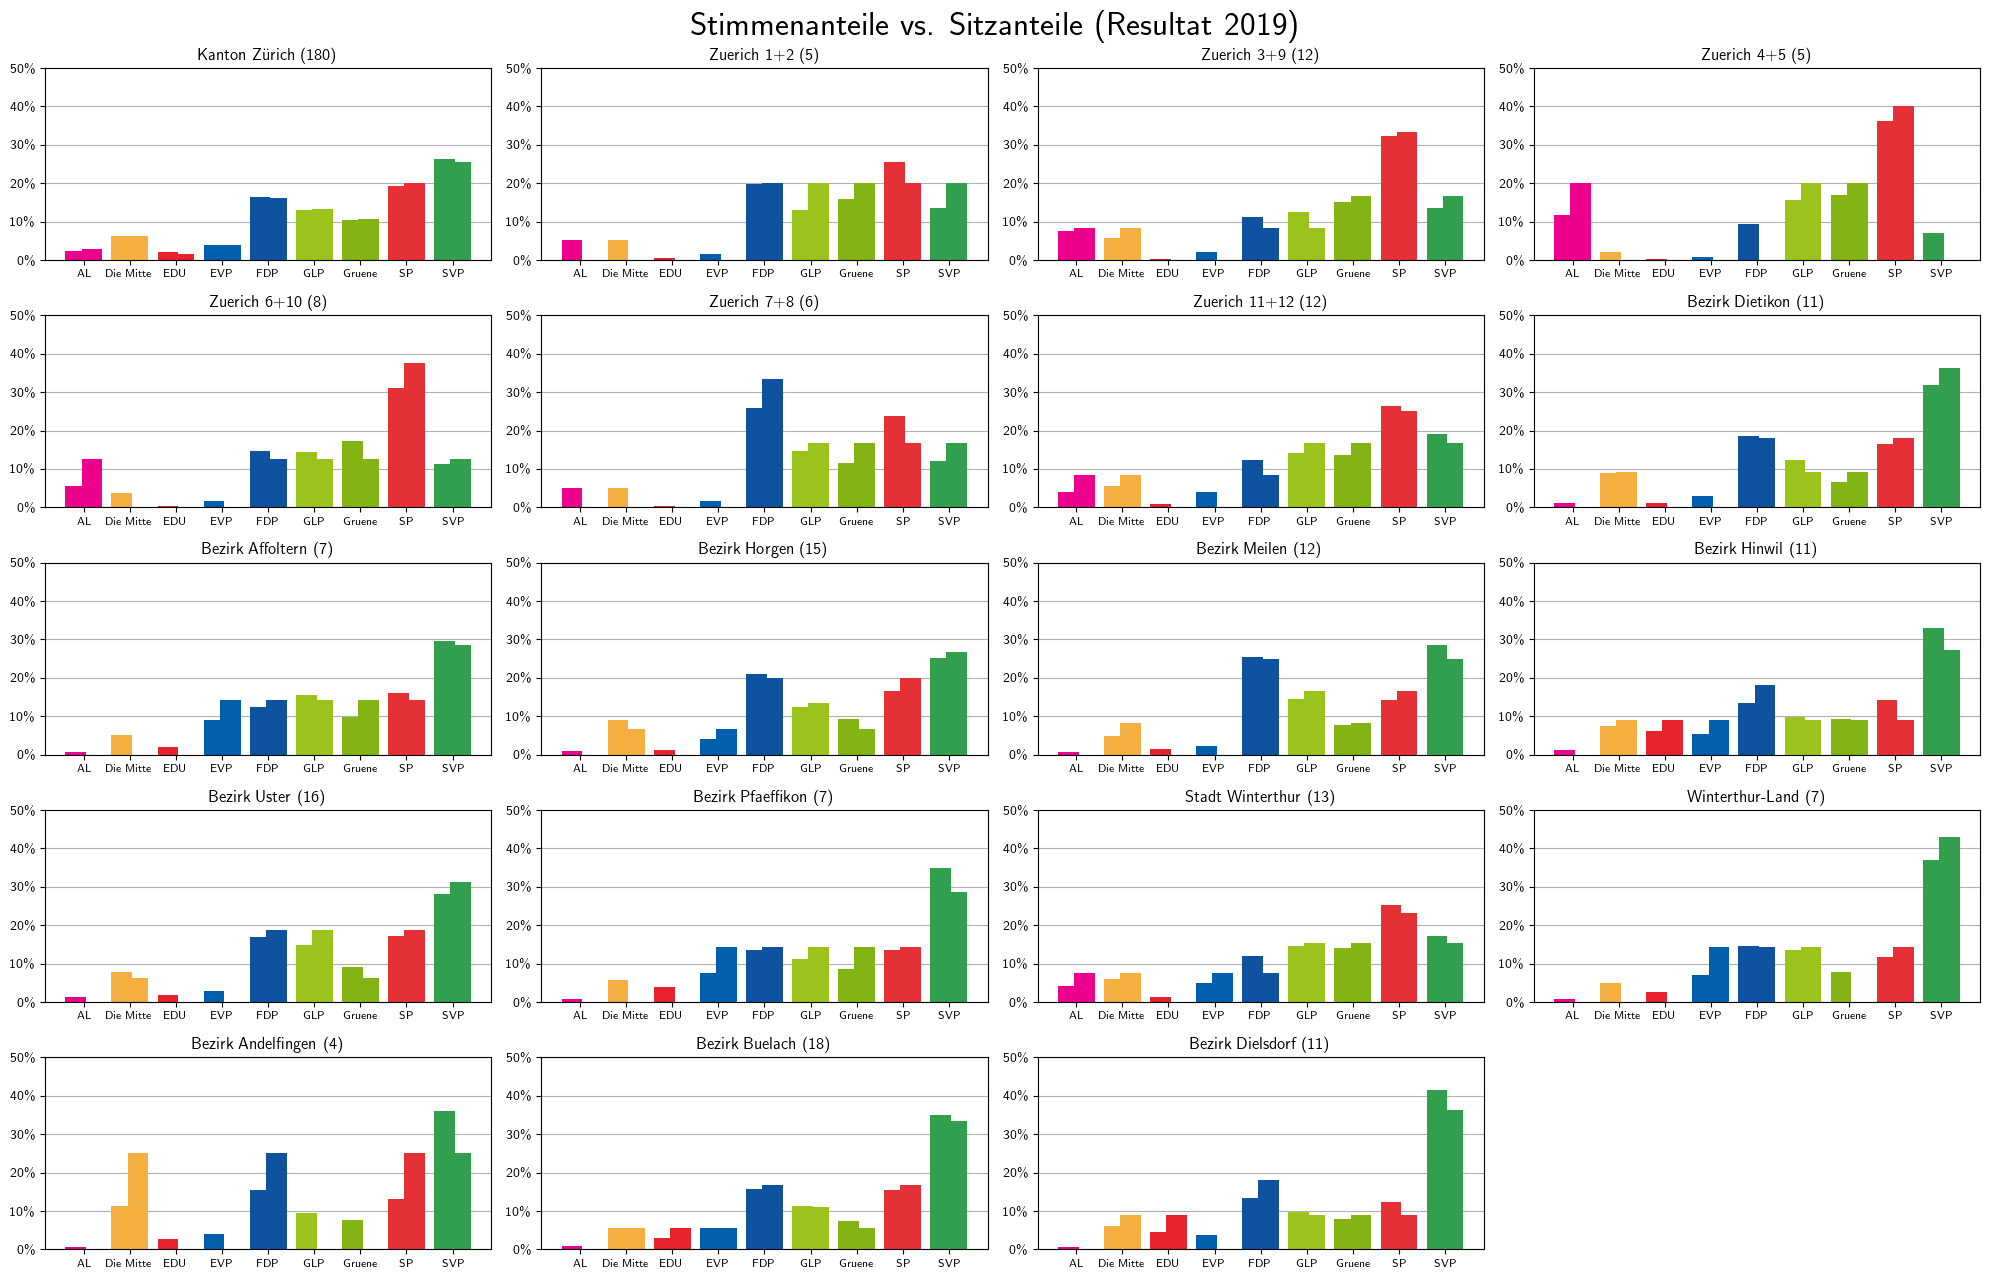

In [4]:
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')
fig, axs = plt.subplots(5, 4, tight_layout=True, figsize=(20,13))
# delete last subplot (only 18 districts + 1 for whole Canton)
fig.delaxes(axs[4, 3])
fig.suptitle("Stimmenanteile vs. Sitzanteile (Resultat 2019)", fontsize=24)

width = 0.45
x = np.arange(len(parties))

# first plot: total
votes_total_percentage = votes_parties.astype(float) / votes_parties.sum()
seats_total_percentage = seats_parties.astype(float) / seats_parties.sum()
axs[0,0].bar(x - width/2 + 0.05, votes_total_percentage, width, color=colors.values())
axs[0,0].bar(x + width/2 - 0.05, seats_total_percentage, width, color=colors.values())
axs[0,0].set_title(f"Kanton Zürich ({seats_parties.sum()})", fontsize=12)
axs[0,0].set_ylim(0, 0.5)
axs[0,0].set_yticks(np.arange(0, 0.6, 0.1), fontsize=8)
axs[0,0].set_xticks(x, labels=parties, fontsize=8)
axs[0,0].yaxis.set_major_formatter(mtick.PercentFormatter(1))
axs[0,0].grid(axis="y")
axs[0,0].set_axisbelow(True)

# remaining plots: districts
for i in range(len(districts)):
    j = (i+1) // 4 
    k = (i+1) % 4
    axs[j, k].bar(x - width/2 + 0.05, votes_percentage[i], width, color=colors.values())
    axs[j, k].bar(x + width/2 - 0.05, seats_percentage[i], width, color=colors.values())
    axs[j, k].set_title(f"{districts[i]} ({seats_districts[i]})", fontsize=12)
    axs[j, k].set_ylim(0, 0.5)
    axs[j, k].set_yticks(np.arange(0, 0.6, 0.1), fontsize=8)
    axs[j, k].set_xticks(x, labels=parties, fontsize=8)
    axs[j, k].yaxis.set_major_formatter(mtick.PercentFormatter(1))
    axs[j, k].grid(axis="y")
    axs[j, k].set_axisbelow(True)

plt.savefig("out/analysis.pdf", dpi=300)